<a href="https://colab.research.google.com/github/arifarman02/Learning_data_science/blob/main/Matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

###Example

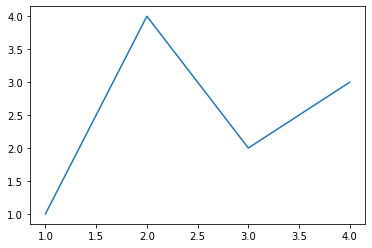

In [66]:
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);

###Parts of a figure

<Figure size 432x288 with 0 Axes>

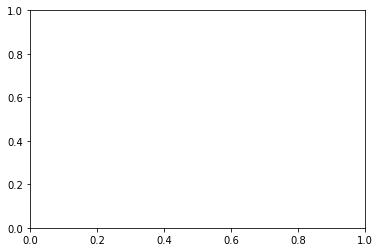

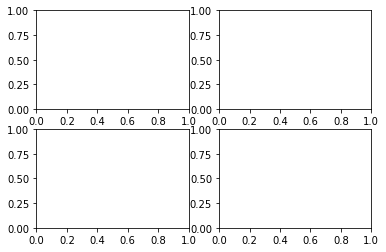

In [67]:
#Figure
fig = plt.figure()
fig, ax = plt.subplots()
fig, axs = plt.subplots(2, 2)

Terminology:

Axes - Contains regions for plotting data

Axis - Set the scale and limits and generate ticks

Artist - Everything visible in a Figure(e.g legend etc.)

###Types of input

Plotting functions expect numpy.array or numpy.ma.masked_array as input, or objects that can be passed to numpy.asarray.
Classes that are similar to arrays ('array-like') such as pandas data objects and numpy.matrix may not work as intended. Common convention is to convert these to numpy.array objects prior to plotting.

In [68]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

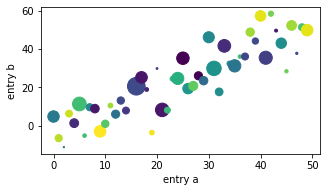

In [69]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7)) #, layout='constrained'
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b');

###Coding styles

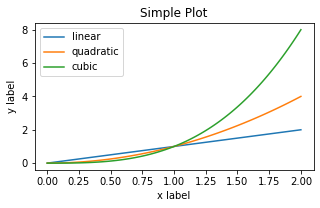

In [70]:
#Object-oriented
x = np.linspace(0, 2, 100)

fig, ax = plt.subplots(figsize=(5, 2.7))#, layout='constrained'
ax.plot(x, x, label='linear')  
ax.plot(x, x**2, label='quadratic')  
ax.plot(x, x**3, label='cubic')  
ax.set_xlabel('x label') 
ax.set_ylabel('y label') 
ax.set_title("Simple Plot") 
ax.legend();

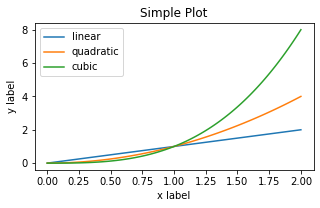

In [71]:
#Pyplot
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 2.7))#, layout='constrained'
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

###Helper functions

In [72]:
def my_plotter(ax, data1, data2, param_dict):
    out = ax.plot(data1, data2, **param_dict)
    return out

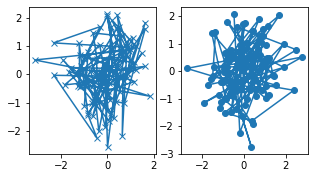

In [73]:
data1, data2, data3, data4 = np.random.randn(4, 100)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2.7))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

###Styling artist

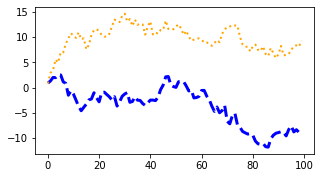

In [74]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

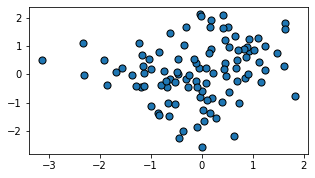

In [75]:
#Colors
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

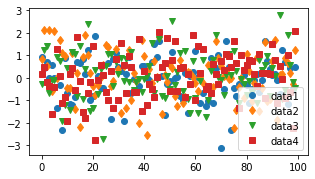

In [76]:
#Linewidths, linestyles, and markersizes
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

###Labelling plots

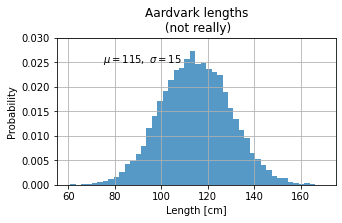

In [77]:
#Axes labels and text
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(5, 2.7))#, layout='constrained'
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

Matplotlib accepts TeX equation expressions in any text expression.

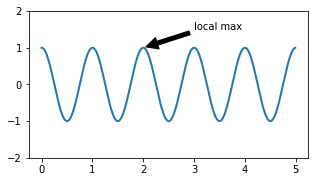

In [78]:
#Annotations
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

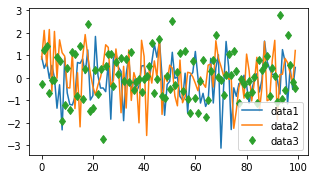

In [79]:
#Legends
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

###Axis scales and ticks

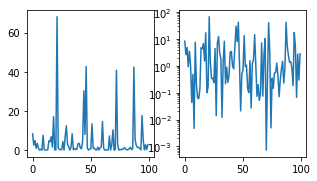

In [80]:
#Scales
fig, axs = plt.subplots(1, 2, figsize=(5, 2.7))#, layout='constrained'
xdata = np.arange(len(data1))
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing the minor parameter of set_xticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  import sys


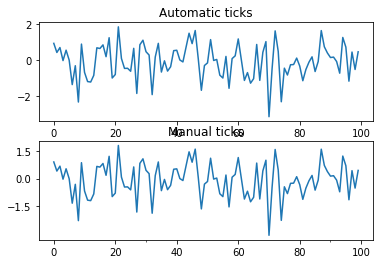

In [81]:
#Tick locaters and formatters
fig, axs = plt.subplots(2, 1)#, layout='constrained'
axs[0].plot(xdata, data1)
axs[0].set_title('Automatic ticks')

axs[1].plot(xdata, data1)
axs[1].set_xticks(np.arange(0, 100, 30), ['zero', '30', 'sixty', '90'])
axs[1].set_yticks([-1.5, 0, 1.5])
axs[1].set_title('Manual ticks');

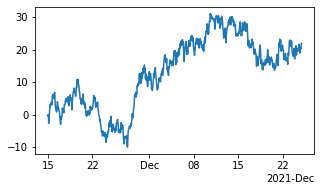

In [82]:
#Plotting dates and strings
fig, ax = plt.subplots(figsize=(5, 2.7))#, layout='constrained'
dates = np.arange(np.datetime64('2021-11-15'), np.datetime64('2021-12-25'), np.timedelta64(1, 'h'))
data = np.cumsum(np.random.randn(len(dates)))
ax.plot(dates, data)
cdf = mpl.dates.ConciseDateFormatter(ax.xaxis.get_major_locator())
ax.xaxis.set_major_formatter(cdf);

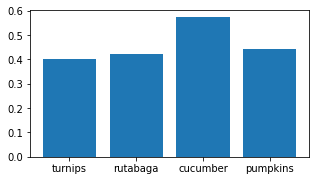

In [83]:
fig, ax = plt.subplots(figsize=(5, 2.7))#, layout='constrained'
categories = ['turnips', 'rutabaga', 'cucumber', 'pumpkins']

ax.bar(categories, np.random.rand(len(categories)));

Text(0.5, 0, 'Angle [rad]')

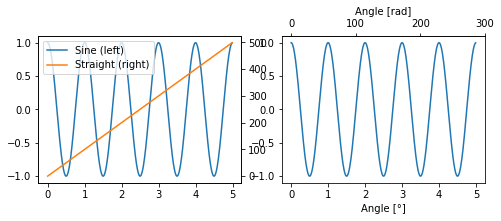

In [84]:
#Additional Axis objects
fig, (ax1, ax3) = plt.subplots(1, 2, figsize=(8, 2.7))#, layout='constrained'
l1, = ax1.plot(t, s)
ax2 = ax1.twinx()
l2, = ax2.plot(t, range(len(t)), 'C1')
ax2.legend([l1, l2], ['Sine (left)', 'Straight (right)'])

ax3.plot(t, s)
ax3.set_xlabel('Angle [°]')
ax4 = ax3.secondary_xaxis('top', functions=(np.rad2deg, np.deg2rad))
ax4.set_xlabel('Angle [rad]')

###Color mapped data

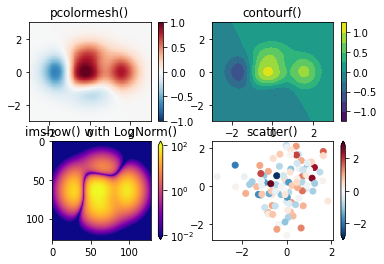

In [85]:
X, Y = np.meshgrid(np.linspace(-3, 3, 128), np.linspace(-3, 3, 128))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

fig, axs = plt.subplots(2, 2)#, layout='constrained'
pc = axs[0, 0].pcolormesh(X, Y, Z, vmin=-1, vmax=1, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[0, 0])
axs[0, 0].set_title('pcolormesh()')

co = axs[0, 1].contourf(X, Y, Z, levels=np.linspace(-1.25, 1.25, 11))
fig.colorbar(co, ax=axs[0, 1])
axs[0, 1].set_title('contourf()')

pc = axs[1, 0].imshow(Z**2 * 100, cmap='plasma', norm=mpl.colors.LogNorm(vmin=0.01, vmax=100))
fig.colorbar(pc, ax=axs[1, 0], extend='both')
axs[1, 0].set_title('imshow() with LogNorm()')

pc = axs[1, 1].scatter(data1, data2, c=data3, cmap='RdBu_r')
fig.colorbar(pc, ax=axs[1, 1], extend='both')
axs[1, 1].set_title('scatter()');